# Clustering

## Plan

### Use Case

Der Use Case umfasst die Kundensegmentierung. Bei der Kundensegmentierung wird der potenzielle Kundenstamm des Unternehmens auf Grundlage seiner Bedürfnisse, Kaufmerkmale usw. in einzelne Gruppen eingeteilt. Ziel ist es, Kundengruppen zu identifizieren, welche empfänglich für bestimmte Preisniveaus von Immobilien sind. Durch diese Identifikation können Kunden besser angesprochen werden bzw. Anzeigen präziser geschalten werden, was die Kaufwahrscheinlichkeit und damit den Umsatz für das Unternehmen steigert. Cluster müssen gebildet werden die Kunden möglichst sicher in für das Unternehmen relevante Guppen einzuordnen. Clustering basiert auf der Gruppierung von Datenpunkten basierend auf Ähnlichkeiten zwischen ihnen und Unterschieden zu anderen. Die Ausgabe, die wir erhalten, ist etwas, das wir uns selbst benennen müssen. 


### Problematik

Um Kundengruppen zu identifizieren benötigen wir ein Modell welches das Kaufverhalten unserer Kunde analysiert und herausfindet, welche Kunden empfänglich für bestimmte Preisniveaus sind um diese Kunden gezielter mit Angeboten anzusteuern. Das Ziel ist, Immobilienanzeigen gezielt auf bestimmte Kundengruppen zu schalten, was die Effektivität der Anzeigen enorm steigert und die Kaufwahrscheinlichkeit erhöht.

### Variablen

Es werden strukturierte Kundenstammdaten verwendet. Anhand von Daten wie Alter, Geschlecht, Einkommen, Ausbildungsstand, ... soll jeder Kunde einem bestimmt Kaufverhalten zugeordnet werden.

### Metriken

Als Erfolg wird das Modell verbucht, wenn es Kunden zuverlässig in Cluster einordnen kann und sich klare Grenzen zwischen den Kundengruppen ergeben. Unser Modell gilt als gescheitert, wenn diese Grenzen nicht erkennbar sind oder nicht aussagekräftig genug sind, um wirtschaftliche Vorteile daraus zu generieren.


## Data

### Datenimport

Importieren aller libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Daten einfügen und Spaltennamen vergeben

In [2]:
dataset = pd.read_csv('Spending_Score.csv',index_col='CustomerID')

### Datenexploration und Erkenntnisgewinn

In [3]:
dataset.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


CustomerID: Kundenidentifikationsnummer (hier irrelevant)
Gender: kategorialen Datentyp; Geschlecht des Kunden.
Age: numerischen Datentyp; Alter des Kunden in Jahren.
Annual Income(k$): numerischen Datentyp; Jahreseinkommen der Kunden in 1000 Dollar
Spending Score: numerischen Datentyp; Punktzahl zwischen 1 und 100 für einen Kunden auf der Grundlage seines Ausgabeverhaltens.

Gender muss vor dem Einsatz im Modell vorverarbeitet und in numerische Werte umgewandelt werden. 

In [5]:
gender= {'Male':0, 'Female':1}
dataset['Gender']= dataset['Gender'].map(gender)

In [6]:
dataset.describe()

,Gender,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### Datenbereinigung und -transformation

In [7]:
dataset.isnull().sum()

Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Keine fehlenden Werte

In [8]:
dataset.drop_duplicates(inplace=True)
dataset.info() # Vergleich mit vorherigem data.info() un zu sehen, ob Values fehlen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender              200 non-null    int64
 1   Age                 200 non-null    int64
 2   Annual_Income_(k$)  200 non-null    int64
 3   Spending_Score      200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


Keine Duplikate!

Mit Hilfe eines Streudiagramms können wir den Datensatz auf Unregelmäßigkeiten überprüfen.

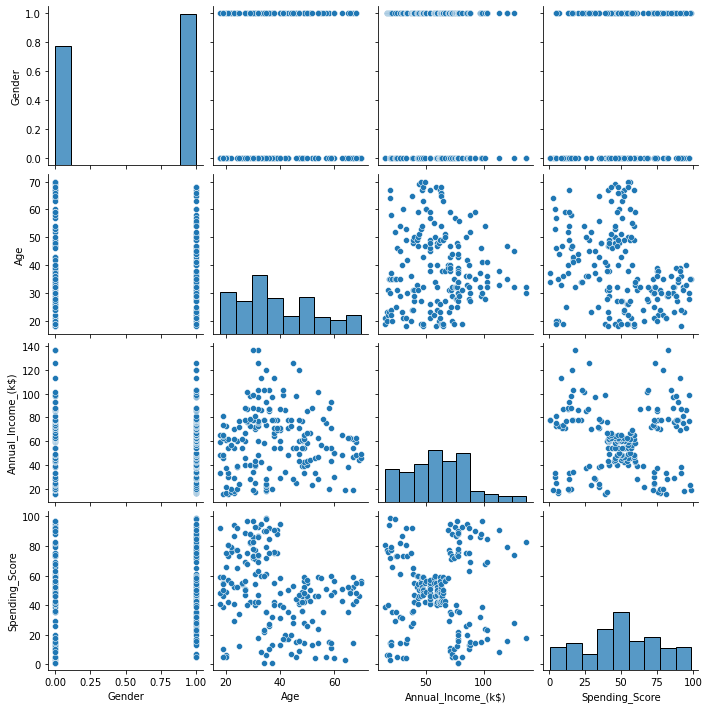

In [9]:
sns.pairplot(dataset)
plt.show()

Es scheinen keine Unregelmäßigkeiten im Datensatz zu bestehen. </br>
Mit Hilfe einer Heatmap können zusätzlich Korrelationen zwischen Variablen aufgezeigt werden.

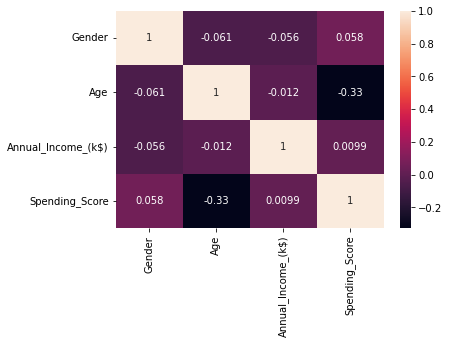

In [10]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

Das Geschlecht korreliert nur in sehr geringem Maße mit dem "Spending Score" und etwas stärker mit dem Jahreseinkommen.
Das Alter der Kunden korreliert recht stark negativ mit "Spending Score" .
Das Jahreseinkommen korreliert nur sehr gering mit dem Alter wie auch das Jahreseinkommen und der "Spending Score".
Da für uns die Korrelation mit dem Kaufverhalten der Kunden also dem Spending Score am wichtigsten ist, wird folglich analysiert, welche Altersgruppen eventuell besonders empfänglich für bestimmte Preisniveaus sind.

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

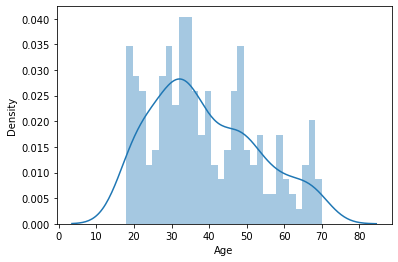

In [11]:
sns.distplot(dataset['Age'], bins=30)

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending_Score', ylabel='Density'>

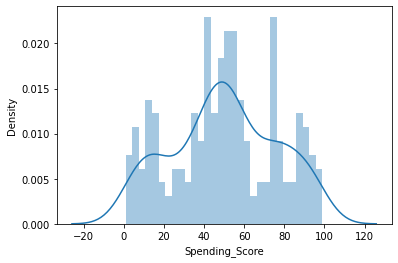

In [12]:
sns.distplot(dataset['Spending_Score'], bins=30)

Age und Spending Score enthalten Werte, die nahezu normal verteilt sind.

### Datenaufbereitung

Für die Modellerstellung sind nur Alter und Spending Score relevant.

In [13]:
x = dataset.iloc[:, [1, 3]].values

## Modell

### Modellauswahl

Modelle welche auf den k-Means-Algorithmus aufbauen sind simpel zu implementieren, skalieren gut mit großen Datensätzen und sind einfach zu interpretieren. Probleme durch viele Ausreißer sind bei unseren Daten ohnehin nicht zu befürchten. Lediglich die Bestimmung eines optimalen K (Anzahl an zu bildenden Gruppen) muss manuell erfolgen, wobei es hierzu einige Hilfsmittel gibt.

Um die am besten geeignete Anzahl an Gruppen zu finden, wenden wir die "Ellbow Method" an.

In [14]:
from sklearn.cluster import KMeans
# Anzahl an Clustern durch Elbow Method bestimmen
# Summe der quadrierten Abstände zwischen jedem Punkt und dessen nächsten Clusterzentrums
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


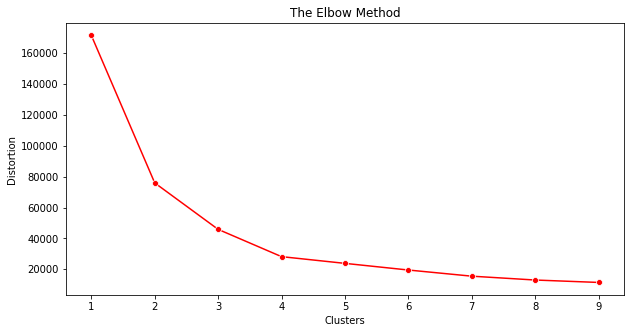

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), distortions, color='red', marker='o')
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.show()

Wir sehen ab 4 Clustern nurnoch geringe Änderungen an der Verzerrung (Distortion). Somit haben wir die optimale Anzahl an zu definierten Clustern bestimmt.

### Modellerstellung

In [16]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
ymeans = kmeans.fit_predict(x)

### Modellvisualisierung

Die einzelnen Cluster werden passende Namen/Label zugeordnet

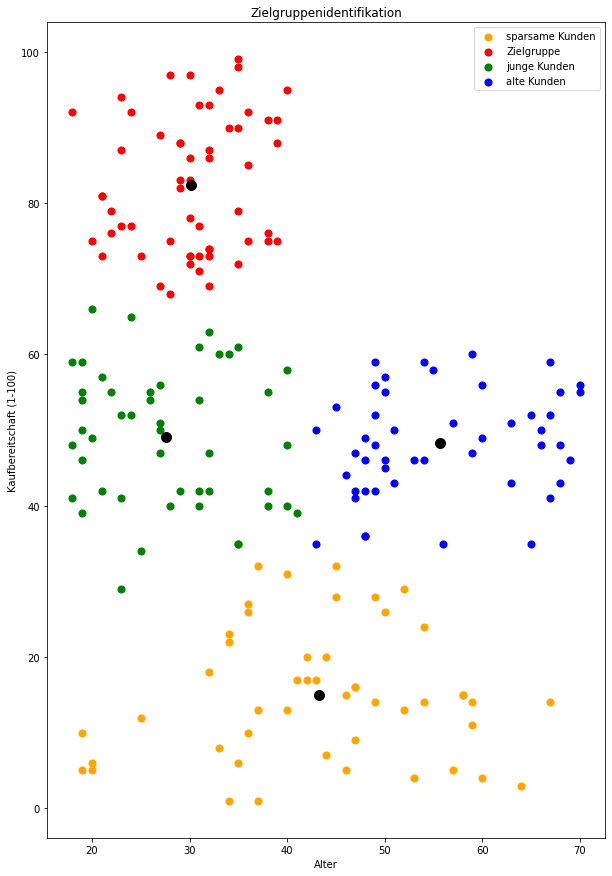

In [17]:
plt.figure(figsize=(10,15))
plt.title('Zielgruppenidentifikation')

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 50, c = 'orange', label = 'sparsame Kunden' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 50, c = 'red', label = 'Zielgruppe')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 50, c = 'green', label = 'junge Kunden')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 50, c = 'blue', label = 'alte Kunden')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100,c = 'black')

plt.xlabel('Alter')
plt.ylabel('Kaufbereitschaft (1-100)')
plt.legend()
plt.grid(False)
plt.show()

### Modellevaluation

Modelevaluation (Silhoutte Analysis)
https://www.kaggle.com/funxexcel/p2-sklearn-k-means-elbow-and-silhouette-method 

Um sicher zu gehen, dass die optimale Anzahl an Clustern wirklich 4 ist, können wir das ganze nochmals mit Hilfe der Silhoutte Methode überprüfen.

In [18]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,8):
    labels=cluster.KMeans(n_clusters=i,init="k-means++").fit(x).labels_
    print ("Clusters = "+ str(i) +" is "
           +str(metrics.silhouette_score(x,labels,metric="euclidean")))

Clusters = 2 is 0.4692341232501655
Clusters = 3 is 0.45300127016521263
Clusters = 4 is 0.49973941540141753
Clusters = 5 is 0.4363508054543454
Clusters = 6 is 0.44418989442824364


Clusters = 7 is 0.42313509747504796


Höchster Wert bei k(clusters) = 4, damit bereits die beste Anzahl an Clustern gefunden

### Interpretation

Durch die Clusteranalyse lässt sich erkennen, je niedriger das Alter, desto höher ist die Ausgabenquote. Daraus schließen wir, dass folglich nur Angebote für hochpreisige Immobilien an unter 40 jährige gesendet werden sollten, da ältere Kunden eine geringere Kaufbereitschaft für hochpreisige Immobilien haben. Gründe hierfür gibt es viele. So kann es Unterschiede zwischen alt zu jung in den Finanzierungsmöglichkeiten oder auch im Lebensstil und den damit einhergehenden Entscheidungen geben. Ältere Kunden erhalten eventuell schwieriger Immobilienkredite in einem ohnehin inflationären Markt und benötigen eventuell gar keine teurere und damit verbunden auch oft größere Immobilie, da die Familienplanung möglicherweiße schon abgeschlossen ist oder die Prioritäten an die Wunschimmobilie eine andere geworden ist. Junge Kunden sind möglicherweiße auch einfach etwas risikobereiter beim Immobilienkauf oder planen mit der gekauften Immobilie noch lange Zeit. Das Modell präsentiert uns anhand der Daten die Gruppen, welche nun vom Unternehmen für Marktanalysen weiterverwendet werden können, um eine noch genauere Zielgruppe für Immobilienpreisniveaus zu finden.